In [1]:
#특성을 변환하는 클래스(변환기)를 사용하여 [2,3]을 [1,2,3,4,6,9]로 변환
#변환한 특성의 의미: 원래 특성(2,3), 각 특성들의 제곱(4,9), 두 특성의 곱(6)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [3]:
#변환된 특성 중 절편과 곱해지는 1을 삭제(불필요하므로 삭제)하려면,
#include_bias=False 매개변수 지정
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [4]:
#판다스로 농어 데이터(length, height, width) 읽기
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)
df.columns

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

Index(['length', ' height', ' width'], dtype='object')

In [5]:
#타깃데이터(무게): https://bit.ly/perch_data 에서 복사
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [6]:
#입력데이터(perch_full)과 타깃데이터(perch_weigth)를
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(42, 3) (14, 3)
(42,) (14,)


In [7]:
#train_input을 변환기를 이용하여 특성 추가
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)
poly.get_feature_names_out() #생성된 특성 확인

(42, 9)


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [8]:
#test_input을 변환기를 이용하여 특성 추가
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

In [9]:
#다중회귀모델 훈련: 여러 특성을 사용하여 선형회귀를 수행
#1개의 특성을 이용항 다항회귀시 발생했던 과소적합 해결
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) #훈련데이터 점수
print(lr.score(test_poly, test_target)) #테스트데이터 점수

0.9903183436982125
0.9714559911594111


In [10]:
#고차항을 5개까지 설정하여 특성을 55개로 증가하여 선형회귀 수행
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
print(poly.get_feature_names_out())

(42, 55)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3'
 'x0^2 x1' 'x0^2 x2' 'x0 x1^2' 'x0 x1 x2' 'x0 x2^2' 'x1^3' 'x1^2 x2'
 'x1 x2^2' 'x2^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^2 x1^2' 'x0^2 x1 x2'
 'x0^2 x2^2' 'x0 x1^3' 'x0 x1^2 x2' 'x0 x1 x2^2' 'x0 x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x0^5' 'x0^4 x1' 'x0^4 x2'
 'x0^3 x1^2' 'x0^3 x1 x2' 'x0^3 x2^2' 'x0^2 x1^3' 'x0^2 x1^2 x2'
 'x0^2 x1 x2^2' 'x0^2 x2^3' 'x0 x1^4' 'x0 x1^3 x2' 'x0 x1^2 x2^2'
 'x0 x1 x2^3' 'x0 x2^4' 'x1^5' 'x1^4 x2' 'x1^3 x2^2' 'x1^2 x2^3' 'x1 x2^4'
 'x2^5']


In [11]:
#55개의 특성으로 변한 훈련데이터를 다시 훈련
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [12]:
#테스트데이터도 특성을 55개로 변환하고 점수확인
test_poly = poly.transform(test_input)
print(lr.score(test_poly, test_target))

-144.40579436844948


# 규제: 릿지와 라쏘

In [17]:
#모델의 과대적합을 막기 위한 규제 필요
#그 전에 특성에 대해 스케일을 정규화하는 작업이 필요함
#표준점수로 변환하는 라이브러리 StandardScaler 사용
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
print(ss.mean_.shape, ss.scale_.shape) #각 특성의 평균과 표준편차
#print(ss.mean_, ss.scale_)

(55,) (55,)


In [14]:
#규제방법1: 릿지(ridge)
#계수를 제곱한 값을 기준으로 규제 적용
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
ridge.alpha

0.9896101671037343
0.9790693977615387


1.0

In [18]:
#alpha: 규제의 강도를 설정하는 하이퍼파라메터
#alpha가 커질수록 규제의 강도가 세져서 과소적합이 되도록 유도
#alpha가 작을수록 규제의 강도가 약해져서 과대적합이 되도록 유도
#alpha의 최적값 탐색: alpha의 최적값은 훈련데이터와 테스트데이터의 점수가 가장 가까운 지점!
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

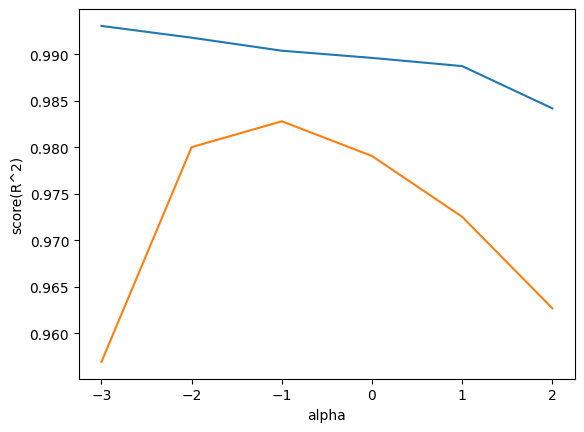

In [20]:
#alpha값에 따른 훈련데이터와 테스트데이터의 점수 추이를 그래프로 확인
#훈련데이터와 테스트데이터의 점수가 동시에 가장 높고 두 점수간 격차가 가장 작은 0.1이 최적의 알파값임
import matplotlib.pyplot as plt

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score(R^2)')
plt.show()

In [22]:
#alpha를 0.1로 설정하고 릿지회귀 실행
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [23]:
#규제방법2: 라쏘(lasso)
#계수의 절대값을 기준으로 규제 적용
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
alpha

0.989789897208096
0.9800593698421883


100

In [24]:
#alpha: 규제의 강도를 설정하는 하이퍼파라메터
#alpha가 커질수록 규제의 강도가 세져서 과소적합이 되도록 유도
#alpha가 작을수록 규제의 강도가 약해져서 과대적합이 되도록 유도
#alpha의 최적값 탐색: alpha의 최적값은 훈련데이터와 테스트데이터의 점수가 가장 가까운 지점!
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


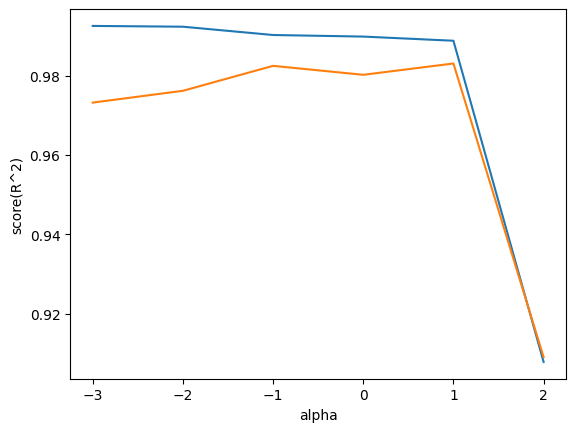

In [25]:
#alpha값에 따른 훈련데이터와 테스트데이터의 점수 추이를 그래프로 확인
#훈련데이터와 테스트데이터의 점수가 동시에 가장 높고 두 점수간격차가 가장 작은 10(10^1)이 최적의 알파값임
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('score(R^2)')
plt.show()

In [33]:
#alpha를 10으로 설정하고 라쏘회귀 실행
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [29]:
print(lasso.coef_)
print(np.sum(lasso.coef_==0))

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
40
